# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [20]:
# setting up environment: importing packages/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading in dataframe:
df = pd.read_csv("./data/ForeignGifts_edu.csv")
df.head(5)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


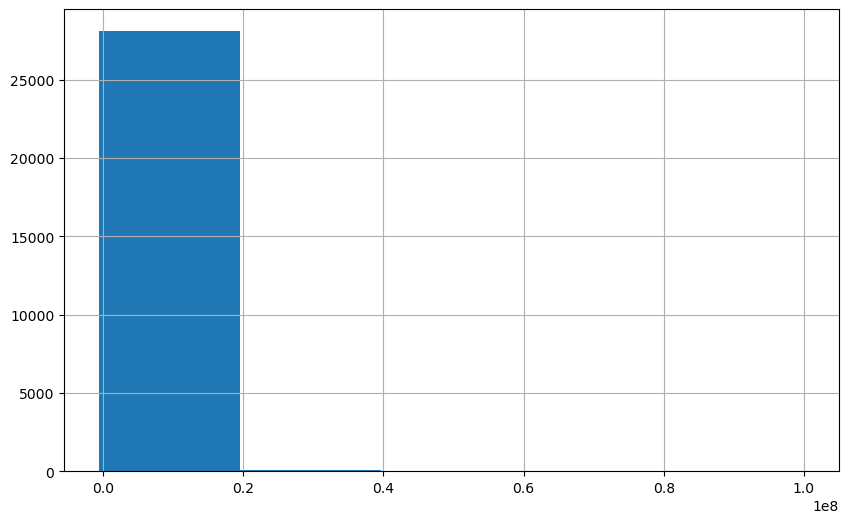

In [21]:
# histogram for 'Foreign Gift Amount'
df['Foreign Gift Amount'].hist(bins = 5, figsize = (10, 6), grid = True)
print(df['Foreign Gift Amount'].describe())

count        28221
unique           3
top       Contract
freq         17274
Name: Gift Type, dtype: object


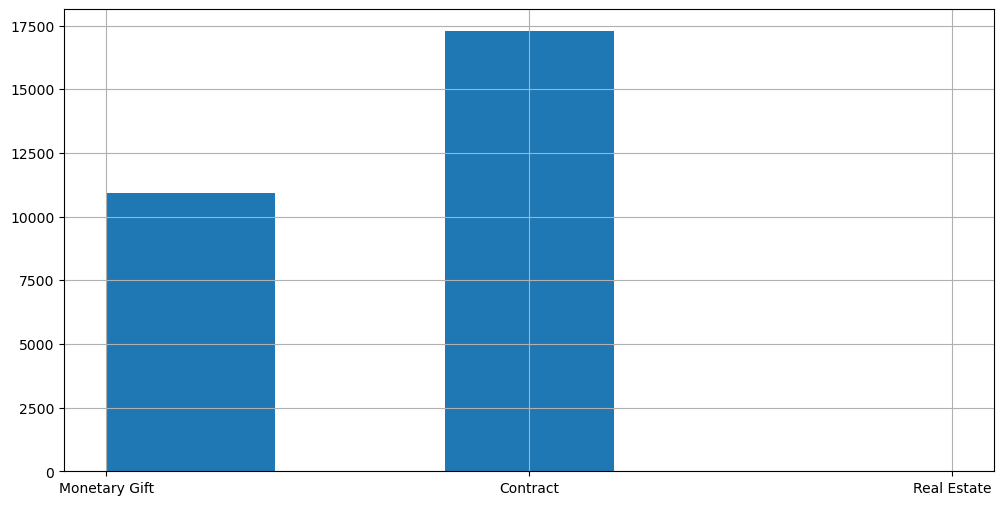

In [22]:
# histogram for 'Gift Type'
df['Gift Type'].hist(bins = 5, figsize=(12, 6), grid = True)
print(df['Gift Type'].describe())

In [23]:
# finding proportion of each 'Gift Type'
print(len(df['Gift Type']))
df['Gift Type'].value_counts('Monetary Values')


28221


Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

The proportion of 'Contract' Gift Type is about 61.21%. The proportion of 'Monetary Gift' is about 38.75%. Lastly, the proportion of 'Real Estate' gift type is about 0.039% of all Gift Types.

<Axes: ylabel='Density'>

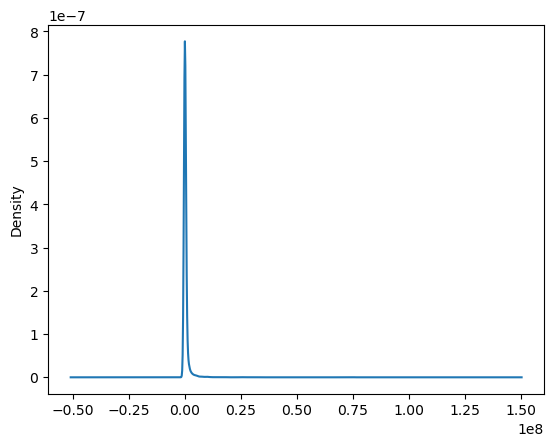

In [24]:
# density kernel plot: Foreign Gift Amount
df['Foreign Gift Amount'].plot.density()

/Users/yuthimadireddy/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


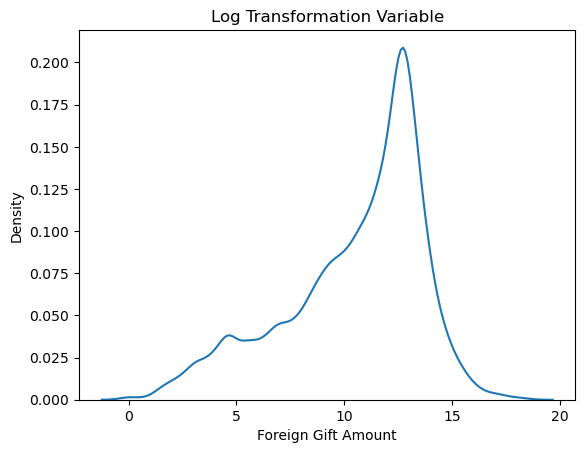

In [25]:
# kernel density log plot:
sns.kdeplot(x = np.log(df['Foreign Gift Amount'])).set(title = 'Log Transformation Variable')
plt.show()

Since our data has a large spike, the kernel density plot can not plot them specifically or close enough since it attempts to smooth the data out. As a result, we lose some of the close/true representation of specific data trends within the data.

What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [26]:
# top 15 countries gifting (number of gifts):
print(df['Country of Giftor'].value_counts().head(15))

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


In [27]:
# highest gifting countries
countries_by_amount = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15)
print(countries_by_amount)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [28]:
# top 15 institutions by amount received:
top_institutions = df.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15)
print(top_institutions)

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


In [29]:
# top giftors by total amount:
top_giftors = df.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [30]:
# loading in data:
drilling_df = pd.read_csv("./data/drilling_rigs.csv")
drilling_df.head(5)

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [31]:
# examining structure of df:
print(drilling_df.shape)

(623, 10)


**Q1a)** There are 623 observations and 10 variables. The 'Month' variable will not be read correctly by Pandas, in the sense that it is not recorded in date-time format. The other variables seem to be formatted correctly, in the sense that all numeric values only contain numeric characters. The 'Month' column must be converted into date-time format. It can be done through the following code:

In [32]:
# converting datetime format
drilling_df['time'] = pd.to_datetime(drilling_df['Month'], format='mixed')
drilling_df['time'].head(5)

0   1973-01-01
1   1973-02-01
2   1973-03-01
3   1973-04-01
4   1973-05-01
Name: time, dtype: datetime64[ns]

In [33]:
# inspecting the first few records
print(drilling_df[['time', 'Active Well Service Rig Count (Number of Rigs)']].head(10))
print(drilling_df['time'].dtype)

        time Active Well Service Rig Count (Number of Rigs)
0 1973-01-01                                           1549
1 1973-02-01                                           1677
2 1973-03-01                                           1805
3 1973-04-01                                           1898
4 1973-05-01                                           1991
5 1973-06-01                                           1994
6 1973-07-01                                           1997
7 1973-08-01                                           2112
8 1973-09-01                                           2227
9 1973-10-01                                           2247
datetime64[ns]


In [41]:
# previewing column names again
print(drilling_df.columns)

Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)', 'time'],
      dtype='object')


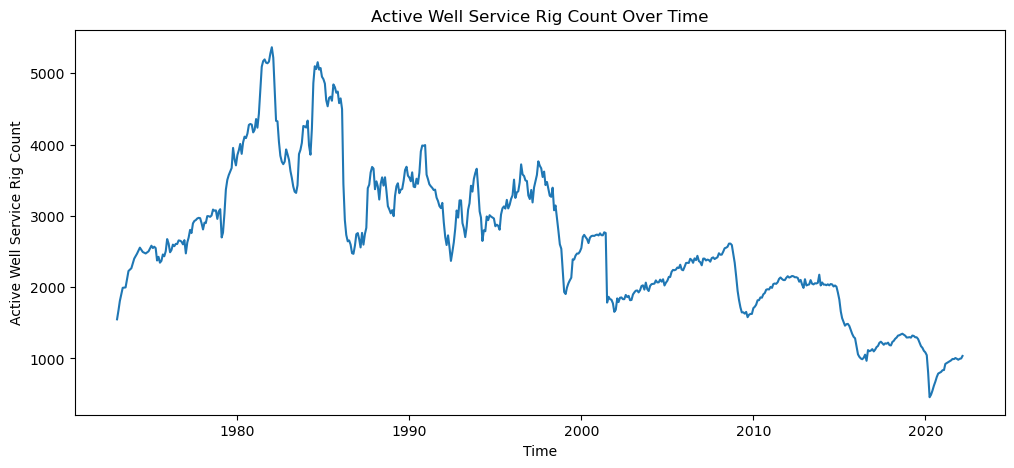

In [47]:
numeric_cols = [
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
    'Active Well Service Rig Count (Number of Rigs)'
]

# converting columns to numeric
drilling_df[numeric_cols] = drilling_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# dropping rows with missing values to ensure plotting works:
drilling_df.dropna(subset=['Active Well Service Rig Count (Number of Rigs)'], inplace=True)

# Line plot of Active Well Service Rig Count over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=drilling_df['time'], y=drilling_df['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel("Time")
plt.ylabel("Active Well Service Rig Count")
plt.title("Active Well Service Rig Count Over Time")

plt.show()

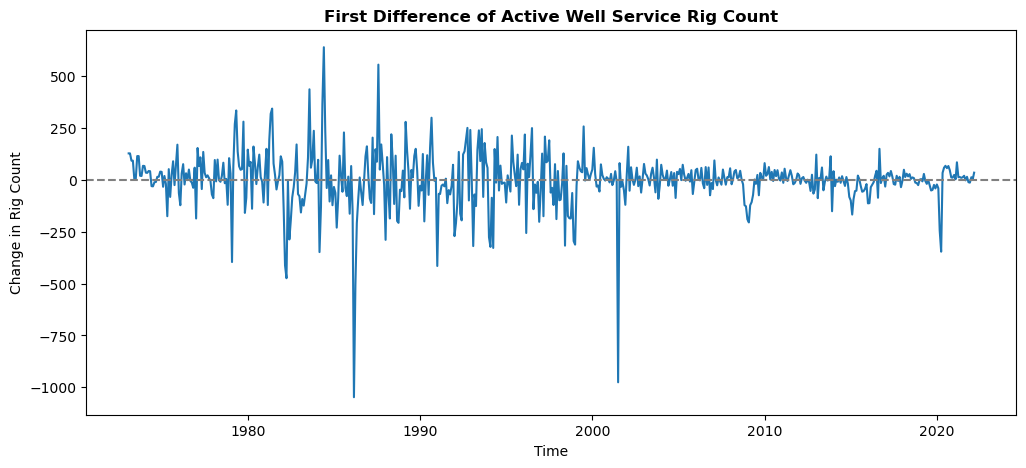

In [50]:
# calculating first difference and plotting it
drilling_df['Rig Count Change'] = drilling_df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12, 5))
sns.lineplot(x = drilling_df['time'], y = drilling_df['Rig Count Change'])

# == X-AXIS ==
plt.xlabel("Time")

# == Y-AXIS ==
plt.ylabel("Change in Rig Count")

# extra formatting:
plt.title("First Difference of Active Well Service Rig Count", weight = 'bold')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

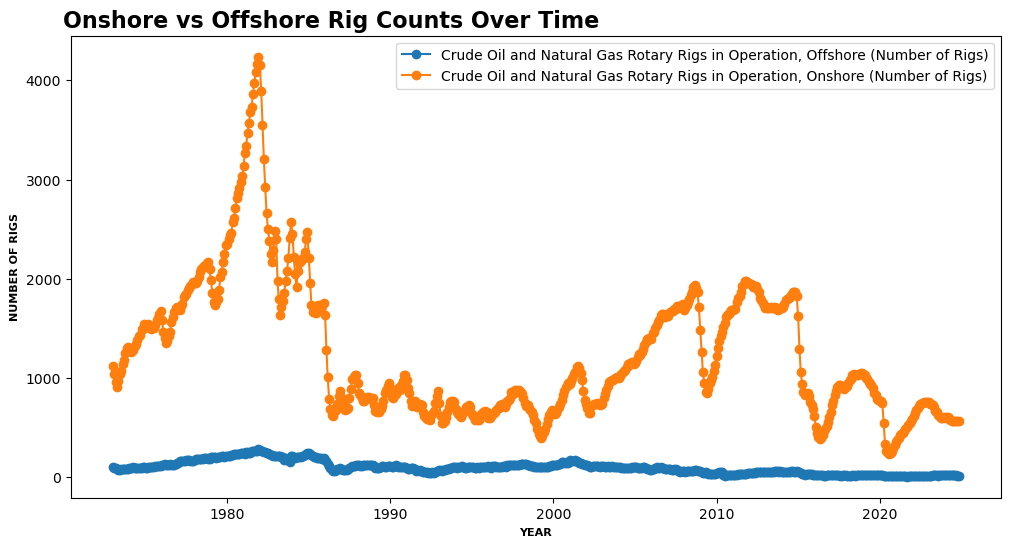

In [ ]:
# Graphing melted data

# melting data: 
melted_df = drilling_df.melt(id_vars=['time'], 
                     value_vars=[
                         'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 
                         'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
                     ], 
                     var_name='Rig Type', 
                     value_name='Rig Count')

# Plotting data:
plt.figure(figsize=(12, 6))
for rig_type, group in melted_df.groupby("Rig Type"):
    plt.plot(group["time"], group["Rig Count"], marker='o', linestyle='-', label=rig_type)

# == X-AXIS ==
plt.xlabel("YEAR", weight = 'bold', fontsize = 8)

# == Y-AXIS ==
plt.ylabel("NUMBER OF RIGS", weight = 'bold', fontsize = 8)

# extra formatting:
plt.title("Onshore vs Offshore Rig Counts Over Time", x = 0.28, weight = 'bold', fontsize = 16)
plt.legend()
plt.grid(False)

plt.show()
